In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set()

We begin by reading the data and summarizing the variables.

In [2]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0801.csv'
df = pd.read_csv(path)
df.head()

,Area,Species
0,44218,100
1,29371,108
2,4244,45
3,3435,53
4,32,16


In [3]:
summary = df.describe()
summary

,Area,Species
count,7.000000,7.000000
mean,11615.142857,48.571429
std,17810.662400,41.652760
min,1.000000,7.000000
25%,18.500000,13.500000
50%,3435.000000,45.000000
75%,16807.500000,76.500000
max,44218.000000,108.000000


The second graph is a log-log scatterplot of number of species versus island area, along with the estimated line for the regression of log number of species on log area.  The parameter $\gamma$ in the species-area relation, $Median\{S|A\} = CA^{\gamma}$, is estimated to be 0.250 (a 95% confidence interval is 0.219 to 0.281).  It is estimated that the median number of species increases by 19% with each doubling of area.

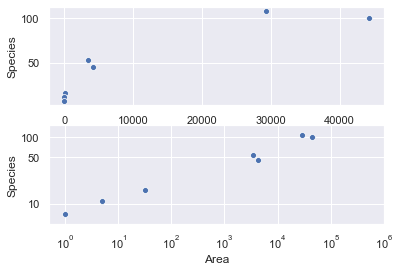

In [14]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1)
sns.scatterplot(x='Area', y='Species', data=df, ax=ax0)
ax1.set(xscale='log', yscale='log')
sns.scatterplot(x='Area', y='Species', data=df, ax=ax1)
ax1.set_xlim(0.5, 1e6)
ax1.set_ylim(5, 150)
ax1.set_yticks([10, 50, 100])
_ = ax1.set_yticklabels(['10', '50', '100'])

In [15]:
model = smf.ols('log(Species) ~ log(Area)', data=df)
results = model.fit()
results.summary()

/Users/jevans/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log(Species)   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     425.3
Date:                Tue, 03 Sep 2019   Prob (F-statistic):           4.96e-06
Time:                        19:28:17   Log-Likelihood:                 5.6211
No. Observations:                   7   AIC:                            -7.242
Df Residuals:                       5   BIC:                            -7.350
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9365      0.088     21.973      0.000       1.710       2.163
log(Area)      0.2497      0.012     20.623      0.000       0.219       0.281
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.970
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.288
Skew:                          -0.480   Prob(JB):                        0.866
Kurtosis:                       3.260   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

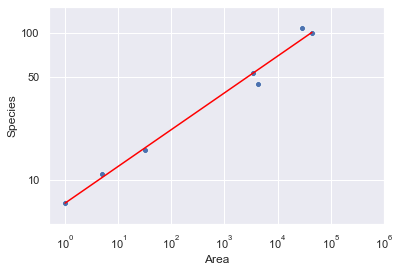

In [19]:
fig, ax = plt.subplots()
ax.set(xscale='log', yscale='log')
sns.scatterplot(x='Area', y='Species', data=df, ax=ax)
ax.set_xlim(0.5, 1e6)
ax.set_ylim(5, 150)
ax.set_yticks([10, 50, 100])
ax.set_yticklabels(['10', '50', '100'])
pred = results.predict()
ax.plot(df.Area, np.exp(pred), color='red')

In [20]:
scipy.stats.t.interval(0.95, 5, loc=results.params['log(Area)'], scale=results.bse['log(Area)'])

(0.21855804407685178, 0.28080178336893485)

In [21]:
results.conf_int()

,0,1
Intercept,1.709959,2.163057
log(Area),0.218558,0.280802
